## Data Initialization

In [1]:
import pickle
import numpy as np
from  lda_gibbs import GibbsLDA
from corpus import corpus, document

print "loading US dataset"
us_01_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989047418vis.p'
us_01_topic_variables = pickle.load(open(us_01_topic_variables_pickle_file,'rb'))
us_02_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989061703vis.p'
us_02_topic_variables = pickle.load(open(us_02_topic_variables_pickle_file,'rb'))
us_03_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989098256vis.p'
us_03_topic_variables = pickle.load(open(us_03_topic_variables_pickle_file,'rb'))
us_04_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989290114vis.p'
us_04_topic_variables = pickle.load(open(us_04_topic_variables_pickle_file,'rb'))
us_05_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989297742vis.p'
us_05_topic_variables = pickle.load(open(us_05_topic_variables_pickle_file,'rb'))
us_06_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989298108vis.p'
us_06_topic_variables = pickle.load(open(us_06_topic_variables_pickle_file,'rb'))
us_07_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989299347vis.p'
us_07_topic_variables = pickle.load(open(us_07_topic_variables_pickle_file,'rb'))
us_08_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989317230vis.p'
us_08_topic_variables = pickle.load(open(us_08_topic_variables_pickle_file,'rb'))
us_09_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989357358vis.p'
us_09_topic_variables = pickle.load(open(us_09_topic_variables_pickle_file,'rb'))
us_10_topic_variables_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p_gibbsLDA__K_90_alpha_0.4_1516989474150vis.p'
us_10_topic_variables = pickle.load(open(us_10_topic_variables_pickle_file,'rb'))
print "finished loading US topic variables..."

print "loading us corpus file"
us_corpus_pickle_file = '/Users/xiwang/sigir_topis_90/sigir.p'
us_f = open(us_corpus_pickle_file,'rb')
us_corpus = pickle.load(us_f)
print "finish loading corpus variables..."

loading US dataset
finished loading US topic variables...
loading us corpus file
finish loading corpus variables...


In [2]:
topic_variable = [us_01_topic_variables, us_02_topic_variables, us_03_topic_variables, us_04_topic_variables, us_05_topic_variables,
                 us_06_topic_variables, us_07_topic_variables, us_08_topic_variables, us_09_topic_variables, us_10_topic_variables]

for var in topic_variable:
    print type(var)

'''
    The content that extracted from tweets related to topic and document info
'''
for var in topic_variable:
    for key in var.keys():
        print key,':',type(var[key])
    
print dir(us_corpus)
'''
    Initialize variables from pickle file, and create corresponding key variable list for each topic variable
'''
vocab = []
doc_lengths = []
topic_term_dists = []
term_frequency = []
doc_topic_dists = []

for var in topic_variable:
    vocab.append(var['vocab'])
    doc_lengths.append(var['doc_lengths'])
    topic_term_dists.append(var['topic_term_dists'])
    term_frequency.append(var['term_frequency'])
    doc_topic_dists.append(var['doc_topic_dists'])
'''
vocab = topic_variables['vocab']
doc_lengths = topic_variables['doc_lengths']
topic_term_dists = topic_variables['topic_term_dists']
term_frequency = topic_variables['term_frequency']
doc_topic_dists = topic_variables['doc_topic_dists']
'''

<type 'dict'>
<type 'dict'>
<type 'dict'>
<type 'dict'>
<type 'dict'>
<type 'dict'>
<type 'dict'>
<type 'dict'>
<type 'dict'>
<type 'dict'>
vocab : <type 'list'>
doc_lengths : <type 'list'>
topic_term_dists : <type 'numpy.ndarray'>
term_frequency : <type 'list'>
doc_topic_dists : <type 'numpy.ndarray'>
vocab : <type 'list'>
doc_lengths : <type 'list'>
topic_term_dists : <type 'numpy.ndarray'>
term_frequency : <type 'list'>
doc_topic_dists : <type 'numpy.ndarray'>
vocab : <type 'list'>
doc_lengths : <type 'list'>
topic_term_dists : <type 'numpy.ndarray'>
term_frequency : <type 'list'>
doc_topic_dists : <type 'numpy.ndarray'>
vocab : <type 'list'>
doc_lengths : <type 'list'>
topic_term_dists : <type 'numpy.ndarray'>
term_frequency : <type 'list'>
doc_topic_dists : <type 'numpy.ndarray'>
vocab : <type 'list'>
doc_lengths : <type 'list'>
topic_term_dists : <type 'numpy.ndarray'>
term_frequency : <type 'list'>
doc_topic_dists : <type 'numpy.ndarray'>
vocab : <type 'list'>
doc_lengths : <typ

"\nvocab = topic_variables['vocab']\ndoc_lengths = topic_variables['doc_lengths']\ntopic_term_dists = topic_variables['topic_term_dists']\nterm_frequency = topic_variables['term_frequency']\ndoc_topic_dists = topic_variables['doc_topic_dists']\n"

##  Aggregate Top frequency words of each Topic

In [72]:
'''
    Selected the top 20 words with highest term frequency for each topic
'''
topic_top_term_list = []
for k in range(len(topic_term_dists)):
    topic_top_term_sub_list = []
    for i in range(len(topic_term_dists[k])):
        vocab_frequency_dict={vocab[k][j] : topic_term_dists[k][i][j] for j in range(len(vocab[k]))}
        sorted_term = sorted(vocab_frequency_dict, key=vocab_frequency_dict.get, reverse=True)
        topic_top_term_sub_list.append(','.join(sorted_term[:20]))
    topic_top_term_list.append(topic_top_term_sub_list)

## Normalize Document Topic Distribution 

In [3]:
import numpy as np
doc_topic_dists = [(doc_topic_dists[i] - doc_topic_dists[i].min(axis=1)[:, np.newaxis]) / (doc_topic_dists[i].max(axis=1)[:, np.newaxis] - doc_topic_dists[i].min(axis=1)[:, np.newaxis]) for i in range(len(doc_topic_dists))] 
doc_topic_dists = [(doc_topic_dists[i] / doc_topic_dists[i].sum(axis=1)[:, np.newaxis]) for i in range(len(doc_topic_dists))]

print sum(doc_topic_dists[0][0])
print np.nonzero(doc_topic_dists[0][1])[0]
print len(doc_topic_dists[0][0])

1.0
[ 4  5  7 11 12 14 17 24 25 30 31 34 35 49 52 56 61 68 70 72 73 74 75 76 79
 80 82 86 87 88 89]
90


## Create topic document list including the related documents for each topic

In [4]:
# sampling topic from doc_topic_distribution 
doc_topic_index = []
for k in range(len(doc_topic_dists)):
    doc_topic_sub_index = []
    for i in range(len(doc_topic_dists[k])):
        doc_topic_sub_index.append(np.random.choice(len(doc_topic_dists[k][i]),1,p=doc_topic_dists[k][i]))
    doc_topic_sub_index = np.reshape(doc_topic_sub_index, len(doc_topic_sub_index))
    doc_topic_index.append(doc_topic_sub_index)

# covert doc_topic sampling result into topic document list
for i in range(len(doc_topic_index)):
    doc_topic_index[i] = doc_topic_index[i].tolist()
topic_document_list = []
for k in range(len(doc_topic_dists)):
    topic_document_sub_list = []
    for i in range(len(doc_topic_dists[k][0])):
        document_list = []
        for j in range(len(doc_topic_index[k])):
            if doc_topic_index[k][j] == i:
                document_list.extend([j])
        topic_document_sub_list.append(document_list)
    topic_document_list.append(topic_document_sub_list)

## Find the minimum and maximum value of the Time Interval

In [5]:
for k in range(len(topic_document_list)):
    print min([min([us_corpus.docs[j].timestamp for j in topic_document_list[k][i]])] for i in range(len(doc_topic_dists[k][1])))
    print max([max([us_corpus.docs[j].timestamp for j in topic_document_list[k][i]])] for i in range(len(doc_topic_dists[k][1])))

[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]
[1470006344038.0]
[1477958379586.0]


## Construct Time Trend Feature

(array([  1.85343178e-10,   1.14057340e-10,   1.14057340e-10,
         1.28314508e-10,   9.98001727e-11,   7.12858376e-11,
         4.27715026e-11,   7.12858376e-11,   4.27715026e-11,
         1.56828843e-10,   1.56828843e-10,   1.71086010e-10,
         9.98001727e-11,   9.98001727e-11,   9.98001727e-11,
         8.55430052e-11,   1.42571675e-11,   1.28314508e-10,
         2.85143351e-11,   8.55430052e-11,   7.12858376e-11,
         4.27715026e-11,   5.70286701e-11,   1.56828843e-10,
         8.55430052e-11,   9.98001727e-11,   5.70286701e-11,
         9.98001727e-11,   1.42571675e-11,   1.42571675e-11,
         7.12858376e-11,   2.85143351e-11,   7.12858376e-11,
         1.14057340e-10,   8.55430052e-11,   5.70286701e-11,
         7.12858376e-11,   2.85143351e-11,   0.00000000e+00,
         0.00000000e+00,   5.70286701e-11,   7.12858376e-11,
         7.12858376e-11,   1.42571675e-11,   8.55430052e-11,
         5.70286701e-11,   2.85143351e-11,   1.42571675e-11,
         1.28314508e-10

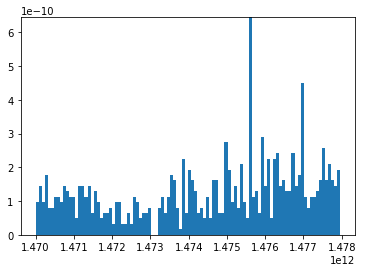

In [6]:
#(uk)start_time = 1504249200000
#(uk)end_time = 1506841199000
start_time = 1470006000000
end_time = 1477958399000
%matplotlib inline
import matplotlib.pyplot as plt

topic_time_list = []
for k in range(len(doc_topic_dists)):
    topic_time_sub_list = []
    for i in range(len(doc_topic_dists[k][1])):
        topic_time_sub_list.append([us_corpus.docs[j].timestamp for j in topic_document_list[k][i]])
    topic_time_list.append(topic_time_sub_list)
print np.histogram(topic_time_list[0][0], bins = 100, density = True, range=(start_time,end_time))

topic_time_hist = []
for k in range(len(doc_topic_dists)):
    topic_time_sub_hist = []
    for i in range(len(topic_time_list[k])):
        topic_time_sub_hist.append(np.histogram(topic_time_list[k][i], bins = 100, density = True, range=(start_time,end_time))[0])
    topic_time_hist.append(topic_time_sub_hist)
#topic_time_hist = [np.histogram((topic_time_list[i] for i in range(len(topic_time_list))), bins = 100, density = True, range=(1462057200000,1478649599000))]
print len(topic_time_hist)
print len(topic_time_hist[0])
plt.hist(topic_time_list[0][6], bins = 100, normed = True, range = (start_time,end_time))
plt.show()

## Clustering the topic related document coordinates

In [7]:
topic_corr_list = []
for k in range(len(topic_document_list)):
    topic_corr_sublist = []
    for i in range(len(topic_document_list[k])):
        topic_corr = []
        for j in range(len(topic_document_list[k][i])):
            if us_corpus.docs[topic_document_list[k][i][j]].loc != None:
                lattitude = (us_corpus.docs[topic_document_list[k][i][j]].loc['bounding_box']['coordinates'][0][0][0] 
                            + us_corpus.docs[topic_document_list[k][i][j]].loc['bounding_box']['coordinates'][0][2][0]) / 2
                longitude = (us_corpus.docs[topic_document_list[k][i][j]].loc['bounding_box']['coordinates'][0][0][1] 
                            + us_corpus.docs[topic_document_list[k][i][j]].loc['bounding_box']['coordinates'][0][1][1]) / 2
            topic_corr.append([lattitude,longitude])
        topic_corr_sublist.append(topic_corr)
    topic_corr_list.append(topic_corr_sublist)

/Library/Python/2.7/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Library/Python/2.7/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


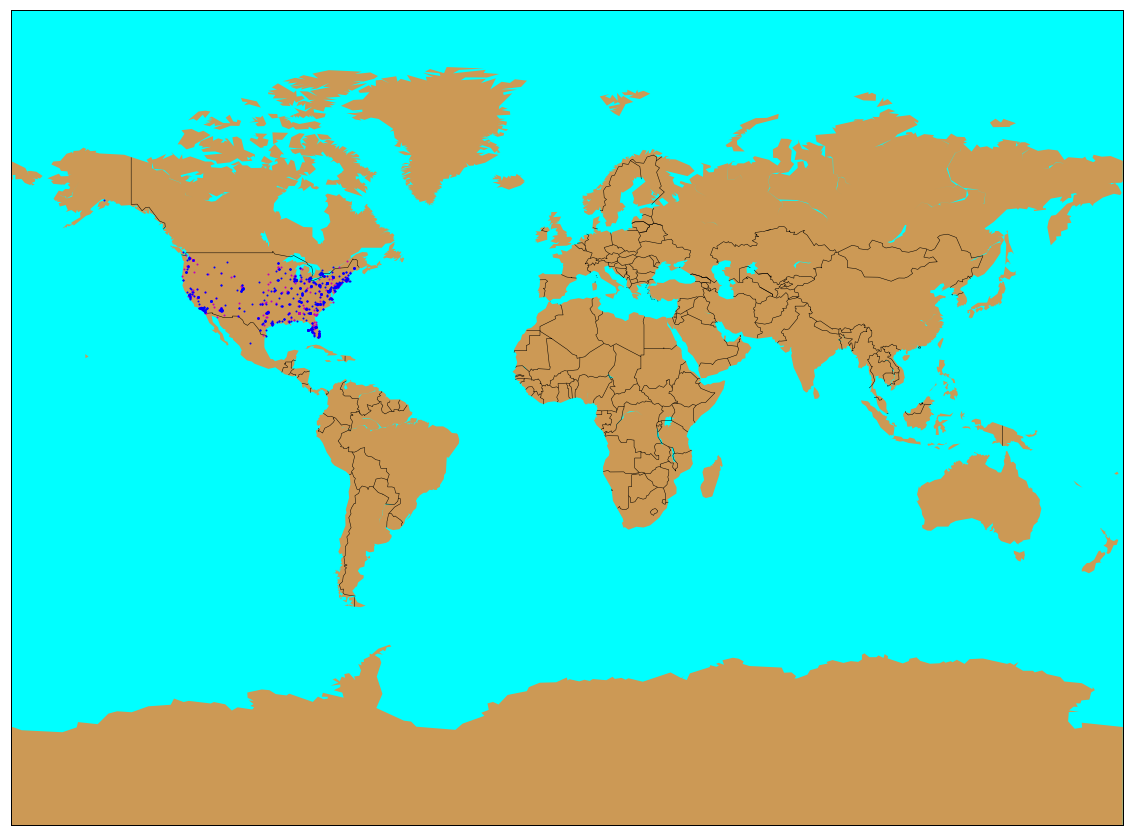

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
map = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#cc9955',lake_color='aqua')
map.drawcountries()

lats = np.asarray(topic_corr_list[0][10])[:,0]
lons = np.asarray(topic_corr_list[0][10])[:,1]
x, y = map(lats, lons)
map.plot(x, y, 'bo',color='m', markersize=1)

lats = np.asarray(topic_corr_list[0][9])[:,0]
lons = np.asarray(topic_corr_list[0][9])[:,1]
x,y = map(lats,lons)
map.plot(x, y, 'bo',markersize=1)

plt.show()

## Calculate the similairty between topic location distribution 

In [8]:
from sklearn.cluster import KMeans
import math
topic_loc_centroid_list = []
topic_loc_centroid_dist_list = []
cluster_num = 10
for k in range(len(topic_corr_list)):
    topic_loc_centroid_sublist = []
    topic_loc_centroid_dist_sublist = []
    for i in range(len(topic_corr_list[k])):
        kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(topic_corr_list[k][i])
        topic_loc_centroid = kmeans.cluster_centers_
        topic_loc_centroid_sublist.append(topic_loc_centroid)
        topic_loc_centroid_dist = []
        for j in range(cluster_num):
            max_distance = 0
            corr_label = kmeans.labels_
            for m in range(len(corr_label)):
                if corr_label[m] == j:
                    distance = math.sqrt(math.pow((topic_corr_list[k][i][m][0]-topic_loc_centroid[j][0]),2) 
                                         + math.pow((topic_corr_list[k][i][m][1]-topic_loc_centroid[j][1]),2))
                    if distance > max_distance:
                        max_distance = distance
            topic_loc_centroid_dist.append(max_distance)
        topic_loc_centroid_dist_sublist.append(topic_loc_centroid_dist)
    topic_loc_centroid_list.append(topic_loc_centroid_sublist)
    topic_loc_centroid_dist_list.append(topic_loc_centroid_dist_sublist)
print topic_loc_centroid_dist_list[0][0]
## Calculate the similarity sample between first topic and second topic
print topic_loc_centroid_list[0][9]
print topic_loc_centroid_list[0][10]

## get the distance between each pair of centroid in topic centroid distribution(This calculation metrics have to be changed)
'''
distance = 0
for i in range(len(topic_loc_centroid_list[23])):
    distance_list = []
    for j in range(len(topic_loc_centroid_list[25])):
        pair_distance = math.sqrt(math.pow((topic_loc_centroid_list[23][i][0]-topic_loc_centroid_list[25][j][0]),2) 
                                 + math.pow((topic_loc_centroid_list[23][i][1]-topic_loc_centroid_list[25][j][1]),2))       
        distance_list.append(pair_distance)
    distance += min(distance_list)
print distance
'''
'''
ax1 = plt.subplot(gs[1])

ax1.annotate("Base Topic",
                  xy=(0.5, 0.5), xycoords='data',
                  xytext=(0.1, 1), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="circle", fc="w",color='red'),
                  )
ax1.annotate("Candidate \n Topic \n 1",
                  xy=(0.5, 0.5), xycoords='data',
                  xytext=(0.3, 1), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="circle", fc="w",color='#cc9900'),
                  )
ax1.annotate("Candidate \n Topic \n 2",
                  xy=(0.5, 0.5), xycoords='data',
                  xytext=(0.5, 1), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="circle", fc="w",color='#3366ff'),
                  )
ax1.axis('off')
'''

[5.964092734513318, 11.216895850497986, 5.798710758895146, 18.416332401100565, 5.862472820317684, 30.9864855653123, 5.106565888234977, 8.997240100666383, 4.781860071961241, 6.134053585965583]
[[-119.01386876   35.64476381]
 [ -78.80588328   39.52775637]
 [ -84.80974655   34.11435118]
 [ -96.96120303   32.3511264 ]
 [-121.46637681   45.88532291]
 [ -73.08611238   41.88166992]
 [ -89.56308749   41.788291  ]
 [ -81.99679202   27.59074265]
 [-109.60588268   36.68484139]
 [-149.7587945    61.2350425 ]]
[[ -85.32332242   41.20682566]
 [-117.55712382   35.09858496]
 [ -74.40906553   40.67396976]
 [ -96.47107863   30.97596243]
 [ -81.91710383   27.52220792]
 [-121.41641893   45.91023607]
 [ -93.12109465   42.46126617]
 [-106.25928498   38.97879081]
 [ -83.60698139   33.99626358]
 [-149.7587945    61.2350425 ]]


'\nax1 = plt.subplot(gs[1])\n\nax1.annotate("Base Topic",\n                  xy=(0.5, 0.5), xycoords=\'data\',\n                  xytext=(0.1, 1), textcoords=\'data\',\n                  size=10, va="center", ha="center",\n                  bbox=dict(boxstyle="circle", fc="w",color=\'red\'),\n                  )\nax1.annotate("Candidate \n Topic \n 1",\n                  xy=(0.5, 0.5), xycoords=\'data\',\n                  xytext=(0.3, 1), textcoords=\'data\',\n                  size=10, va="center", ha="center",\n                  bbox=dict(boxstyle="circle", fc="w",color=\'#cc9900\'),\n                  )\nax1.annotate("Candidate \n Topic \n 2",\n                  xy=(0.5, 0.5), xycoords=\'data\',\n                  xytext=(0.5, 1), textcoords=\'data\',\n                  size=10, va="center", ha="center",\n                  bbox=dict(boxstyle="circle", fc="w",color=\'#3366ff\'),\n                  )\nax1.axis(\'off\')\n'

/Library/Python/2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Library/Python/2.7/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Library/Python/2.7/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/Library/Python/2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

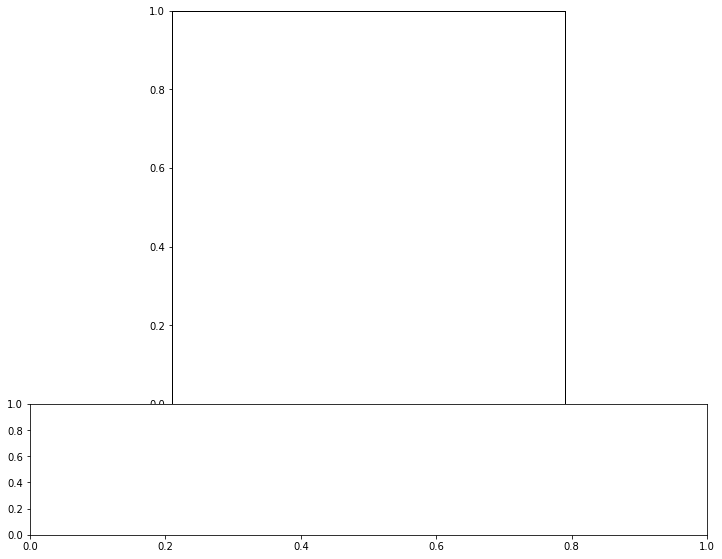

In [9]:
import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.05, hspace = 0.00, left = 0.05, right=0.99, top=0.99, bottom = 0.08)

gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 

'''
map = Basemap(projection='mill',llcrnrlat=30,urcrnrlat=70,\
            llcrnrlon=-50,urcrnrlon=60,resolution='c')
'''


def shoot(lon, lat, azimuth, maxdist=None):
    """Shooter Function
    Original javascript on http://williams.best.vwh.net/gccalc.htm
    Translated to python by Thomas Lecocq
    """
    glat1 = lat * np.pi / 180.
    glon1 = lon * np.pi / 180.
    s = maxdist / 1.852
    faz = azimuth * np.pi / 180.
 
    EPS= 0.00000000005
    if ((np.abs(np.cos(glat1))<EPS) and not (np.abs(np.sin(faz))<EPS)):
        alert("Only N-S courses are meaningful, starting at a pole!")
 
    a=6378.13/1.852
    f=1/298.257223563
    r = 1 - f
    tu = r * np.tan(glat1)
    sf = np.sin(faz)
    cf = np.cos(faz)
    if (cf==0):
        b=0.
    else:
        b=2. * np.arctan2 (tu, cf)
 
    cu = 1. / np.sqrt(1 + tu * tu)
    su = tu * cu
    sa = cu * sf
    c2a = 1 - sa * sa
    x = 1. + np.sqrt(1. + c2a * (1. / (r * r) - 1.))
    x = (x - 2.) / x
    c = 1. - x
    c = (x * x / 4. + 1.) / c
    d = (0.375 * x * x - 1.) * x
    tu = s / (r * a * c)
    y = tu
    c = y + 1
    while (np.abs (y - c) > EPS):
 
        sy = np.sin(y)
        cy = np.cos(y)
        cz = np.cos(b + y)
        e = 2. * cz * cz - 1.
        c = y
        x = e * cy
        y = e + e - 1.
        y = (((sy * sy * 4. - 3.) * y * cz * d / 6. + x) *
              d / 4. - cz) * sy * d + tu
 
    b = cu * cy * cf - su * sy
    c = r * np.sqrt(sa * sa + b * b)
    d = su * cy + cu * sy * cf
    glat2 = (np.arctan2(d, c) + np.pi) % (2*np.pi) - np.pi
    c = cu * cy - su * sy * cf
    x = np.arctan2(sy * sf, c)
    c = ((-3. * c2a + 4.) * f + 4.) * c2a * f / 16.
    d = ((e * cy * c + cz) * sy * c + y) * sa
    glon2 = ((glon1 + x - (1. - c) * d * f + np.pi) % (2*np.pi)) - np.pi    
 
    baz = (np.arctan2(sa, b) + np.pi) % (2 * np.pi)
 
    glon2 *= 180./np.pi
    glat2 *= 180./np.pi
    baz *= 180./np.pi
 
    return (glon2, glat2, baz)

def equi(m, centerlon, centerlat, radius, *args, **kwargs):
    glon1 = centerlon
    glat1 = centerlat
    X = []
    Y = []
    for azimuth in range(0, 360):
        glon2, glat2, baz = shoot(glon1, glat1, azimuth, radius)
        X.append(glon2)
        Y.append(glat2)
    X.append(X[0])
    Y.append(Y[0])
 
    #~ m.plot(X,Y,**kwargs) #Should work, but doesn't...
    X,Y = m(X,Y)
    ax0.plot(X,Y,**kwargs)

    
with open("sigirtopicset.txt","r") as topic_setf:
    lines = topic_setf.readlines()
    # read topic selection from file
    for line in lines:
        indx = int(line[3:4])
        base_topic = int(line[4:6])
        candidate_topic_1 = int(line[8:10])
        candidate_topic_2 = int(line[12:14])
        ax0 = plt.subplot(gs[0])
        map = Basemap(projection='mill',llcrnrlat=-30,urcrnrlat=70,\
            llcrnrlon=-170,urcrnrlon=60,resolution='c')
        map.drawmapboundary(fill_color='white')
        map.fillcontinents(color='#d9d9d9',lake_color='white')
        map.drawcoastlines(color='gray')
        map.drawcountries(color='gray')
        for i in range(len(topic_loc_centroid_list[indx][base_topic])):
            if i == 0:
                equi(map,topic_loc_centroid_list[indx][base_topic][i][0], topic_loc_centroid_list[indx][base_topic][i][1], topic_loc_centroid_dist_list[indx][base_topic][i]*25, lw = 1., color = 'red', label='Base Topic')
            else:
                equi(map,topic_loc_centroid_list[indx][base_topic][i][0], topic_loc_centroid_list[indx][base_topic][i][1], topic_loc_centroid_dist_list[indx][base_topic][i]*25, lw = 1., color = 'red')


        for i in range(len(topic_loc_centroid_list[indx][candidate_topic_1])):
            if i == 0:
                equi(map,topic_loc_centroid_list[indx][candidate_topic_1][i][0], topic_loc_centroid_list[indx][candidate_topic_1][i][1], topic_loc_centroid_dist_list[indx][candidate_topic_1][i]*25, lw = 1., color = '#cc9900',label='Candidate Topic 1')
            else:
                equi(map,topic_loc_centroid_list[indx][candidate_topic_1][i][0], topic_loc_centroid_list[indx][candidate_topic_1][i][1], topic_loc_centroid_dist_list[indx][candidate_topic_1][i]*25, lw = 1., color = '#cc9900')
            
        for i in range(len(topic_loc_centroid_list[indx][candidate_topic_2])):
            if i == 0:
                equi(map,topic_loc_centroid_list[indx][candidate_topic_2][i][0], topic_loc_centroid_list[indx][candidate_topic_2][i][1], topic_loc_centroid_dist_list[indx][candidate_topic_2][i]*25, lw = 1., color = '#3366ff',label='Candidate Topic 2')
            else:
                equi(map,topic_loc_centroid_list[indx][candidate_topic_2][i][0], topic_loc_centroid_list[indx][candidate_topic_2][i][1], topic_loc_centroid_dist_list[indx][candidate_topic_2][i]*25, lw = 1., color = '#3366ff')

        plt.legend(loc=3)
        # plt.figure(2) 
        ax2 = plt.subplot(gs[1])
        # plot the base topic
        y,binEdges= np.histogram(topic_time_list[indx][base_topic], bins=50, range = (start_time,end_time))
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        ax2.plot(bincenters,y,'-',color='red',label='Base Topic')

        # plot the first candidate topic
        y,binEdges= np.histogram(topic_time_list[indx][candidate_topic_1], bins=50, range = (start_time,end_time))
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        ax2.plot(bincenters,y,'-', color='#cc9900',label='Candidate Topic 1')

        #plot the second candidate topic
        y,binEdges= np.histogram(topic_time_list[indx][candidate_topic_2], bins=50, range = (start_time,end_time))
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        ax2.plot(bincenters,y,'-',color='#3366ff',label='Candidate Topic 2')

        ax2.legend(loc=2)

        duration = 5
        new_x_v = [bincenters[i] for i in range(len(bincenters)) if i % duration == 0]

        x_labels = [ datetime.datetime.fromtimestamp(b/1000.0).strftime('%d/%m/%Y') for b in new_x_v]
        plt.xticks(new_x_v, x_labels, rotation=20, fontsize=10)
        plt.savefig('/Users/xiwang/Desktop/Plot_sigir/%s.png' %line)
        ax0 = plt.subplot(gs[0])
        plt.cla()
        ax2 = plt.subplot(gs[1])
        plt.cla()
#_, edges, _ = ax1.hist(topic_time_list[3], bins = 100, normed = True, range = (1477897200000,1478591999000))
#plt.xlim(1477897200000, 1478591999000)
#set(gca, 'Position', [hsp2(1:3)  2*hsp1(4)])


In [216]:
import operator
# us
us_topic_URL = "http://130.209.249.31:12346/topic"
us_word_URL = "http://130.209.249.31:12346/words"

us_start_time = 1470006000000
us_end_time = 1477958399000

def getWordSimilarity(w1, w2, word_URL):
    words = {'w1':w1, 'w2':w2}
    resp = requests.post(word_URL,json=words)
    return float(resp.json()['Similairty'])

def getTwoTopicsDistance_vecsum(topic1, topic2, word_URL):
    words1 = topic1.split(',')
    words2 = topic2.split(',')
    sumV = 0.0 
    count = 0.0
    for w1 in words1:
        for w2 in words2:
            sumV += getWordSimilarity(w1, w2, word_URL)
            count += 1
    sumV /= count
    return sumV 

def getTwoTopicsDistance_minipath(topic1, topic2, word_URL):
    words1 = topic1.split(',')
    words2 = topic2.split(',')
    sumV = 0.0 
    for w1 in words1:
        tmp = [getWordSimilarity(w1, w2,word_URL) for w2 in words2]
        sumV += sorted(tmp, reverse=True)[0]
    return sumV

def getTwoTopicsDistance_thred(topic1, topic2, word_URL, thred):
    words1 = topic1.split(',')
    words2 = topic2.split(',')
    count = 0 
    for w1 in words1:
        tmp = [getWordSimilarity(w1, w2, word_URL) for w2 in words2]
        count += sum([1 for t in tmp if t >= thred])
    return count

def topic_coh(topic_s,topic_URL):
    topic ={'topic':topic_s}
    resp = requests.post(topic_URL, json=topic)
    return float(resp.json()['Similairty'])

def cosine_similarity_new(topic_dist_1, topic_dist_2):
    # get the index of the 15 highest value in two topic term distribution
    max_index_1 = np.argsort(topic_dist_1)[-100:][::-1]
    max_index_2 = np.argsort(topic_dist_2)[-100:][::-1]
    max_index = np.unique(np.concatenate((max_index_1,max_index_2),0))
    #print max_index
    selected_dist_1 = [topic_dist_1[x] for x in max_index]
    selected_dist_2 = [topic_dist_2[x] for x in max_index]
    return cosine_similarity([selected_dist_1],[selected_dist_2])[0][0]

def loc_distance(indx, x, y):
    distance = 0
    for i in range(len(topic_loc_centroid_list[indx][x])):
        distance_list = []
        for j in range(len(topic_loc_centroid_list[indx][y])):
            pair_distance = haversine((topic_loc_centroid_list[indx][x][i][0],topic_loc_centroid_list[indx][x][i][1]),
                                      (topic_loc_centroid_list[indx][y][j][0],topic_loc_centroid_list[indx][y][j][1]))       
            distance_list.append(pair_distance)
        distance += min(distance_list)
    return distance

def generate_cos_distance(indx, x, y):
    distance_list_x = []
    distance_list_y = []
    for i in range(len(topic_loc_centroid_list[indx][x])):
        distance_list = {}
        for j in range(len(topic_loc_centroid_list[indx][y])):
            pair_distance = haversine((topic_loc_centroid_list[indx][x][i][0],topic_loc_centroid_list[indx][x][i][1]),
                                      (topic_loc_centroid_list[indx][y][j][0],topic_loc_centroid_list[indx][y][j][1]))       
            distance_list[i,j] = pair_distance
        min_pair = min(distance_list, key=operator.itemgetter(1))
        distance_list_x.append(topic_loc_centroid_list[indx][x][min_pair[0]][0])
        distance_list_x.append(topic_loc_centroid_list[indx][x][min_pair[0]][1])
        distance_list_y.append(topic_loc_centroid_list[indx][y][min_pair[1]][0])
        distance_list_y.append(topic_loc_centroid_list[indx][y][min_pair[1]][1])
    return cosine_similarity([distance_list_x],[distance_list_y])[0][0]

## Evaluate the performance of each topic similarity approach through Kappa Agreement

In [1104]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.pairwise import cosine_similarity
import requests
from sklearn.metrics import mean_squared_error
from haversine import haversine
'''
    Read Crowdsourcing result from "sigir_result.p" file
'''
result_dict, agreement = pickle.load(open("sigir_result_cos.p",'rb'))


ground_truth = []
cosine_similarity_result = []
cosine_similarity_time_result = []
cosine_similarity_loc_result = []
cosine_similarity_time_loc_result = []
word_emb_sim_result = []
word_emb_time_sim_result = []
word_emb_loc_sim_result = []
word_emb_sim_time_loc_result = []
time_trend_list = []
loc_similarity_list = []
cos_sim_list = []
word_emb_sim_list = []


'''
max_distance = 0
min_distance = 0
for key in result_dict:
    indx = int(key[2:4])
    base_topic = int(key[4:7])
    candidate_topic_1 = int(key[7:10])
    candidate_topic_2 = int(key[10:13])
    if max_distance == 0:
        max_distance = loc_distance(indx,base_topic,candidate_topic_1)
    if min_distance == 0:
        min_distance = loc_distance(indx,base_topic,candidate_topic_1)
    if loc_distance(indx,base_topic,candidate_topic_1) > max_distance:
        max_distance = loc_distance(indx,base_topic,candidate_topic_1)
    if loc_distance(indx,base_topic,candidate_topic_2) > max_distance:
        max_distance = loc_distance(indx,base_topic,candidate_topic_2)
    if loc_distance(indx,base_topic,candidate_topic_1) < min_distance:
        min_distance = loc_distance(indx,base_topic,candidate_topic_1)
    if loc_distance(indx,base_topic,candidate_topic_2) < min_distance:
        min_distance = loc_distance(indx,base_topic,candidate_topic_2)
'''
        
for key in result_dict:
    ground_truth.append(result_dict[key])
    '''
        Obtain the test topic set according to the predefined id
    '''
    indx = int(key[2:4])
    base_topic = int(key[4:7])
    candidate_topic_1 = int(key[7:10])
    candidate_topic_2 = int(key[10:13])
    '''
       Calculate the Location Similarity 
    '''
    loc_similarity_1 = generate_cos_distance(indx,base_topic,candidate_topic_1)
    loc_similarity_2 = generate_cos_distance(indx,base_topic,candidate_topic_2)
    #loc_similarity_1 = loc_similarity_1 - min_distance / (max_distance - min_distance)
    #loc_similarity_2 = loc_similarity_2 - min_distance / (max_distance - min_distance)
    #loc_similarity_1 = 1 - loc_similarity_1
    #loc_similarity_2 = 1 - loc_similarity_2
    loc_similarity_list.append(loc_similarity_1 - loc_similarity_2)
    
    '''
        Calculate the time_trending similarity
    '''
    #topic_trend_sim_1 = math.sqrt(mean_squared_error(topic_time_hist[indx][base_topic],topic_time_hist[indx][candidate_topic_1]))
    #topic_trend_sim_2 = math.sqrt(mean_squared_error(topic_time_hist[indx][base_topic],topic_time_hist[indx][candidate_topic_2]))
    time_trend_sim_1 = cosine_similarity([topic_time_hist[indx][base_topic]],[topic_time_hist[indx][candidate_topic_1]])[0][0]
    time_trend_sim_2 = cosine_similarity([topic_time_hist[indx][base_topic]],[topic_time_hist[indx][candidate_topic_2]])[0][0]
    time_trend = time_trend_sim_1 - time_trend_sim_2
    time_trend_list.append(time_trend)
    '''
        Calculate the Cosine Similarity 
    '''
    cos_sim_1 = cosine_similarity([topic_term_dists[indx][base_topic]],[topic_term_dists[indx][candidate_topic_1]])[0][0]
    cos_sim_2 = cosine_similarity([topic_term_dists[indx][base_topic]],[topic_term_dists[indx][candidate_topic_2]])[0][0]
    if cos_sim_1 > cos_sim_2:
        cosine_similarity_result.append(1)
    elif cos_sim_1 < cos_sim_2:
        cosine_similarity_result.append(2)
    
    cos_sim = cos_sim_1 - cos_sim_2
    cos_sim_list.append(cos_sim)
    '''
        Calculate the Cosine_time similarity
    '''
    cos_time_sim_1 = cos_sim_1 * 0.8 + time_trend_sim_1 * 0.2
    cos_time_sim_2 = cos_sim_2 *0.8 + time_trend_sim_2 * 0.2
    if cos_time_sim_1 > cos_time_sim_2:
        cosine_similarity_time_result.append(1)
    elif cos_time_sim_1 < cos_time_sim_2:
        cosine_similarity_time_result.append(2)    
    '''
        #Calculate the Cosine_loc similarity
    '''
    cos_loc_sim_1 = cos_sim_1 * 0.8 + loc_similarity_1 * 0.2
    cos_loc_sim_2 = cos_sim_2 * 0.8 + loc_similarity_2 * 0.2
    if cos_loc_sim_1 > cos_loc_sim_2:
        cosine_similarity_loc_result.append(1)
    elif cos_loc_sim_1 < cos_loc_sim_2:
        cosine_similarity_loc_result.append(2)
        
    cos_time_loc_sim_1 = (-2.4450851 * cos_sim_1) + (1.006728 * time_trend_sim_1) + (17.27921926 * loc_similarity_1) 
    cos_time_loc_sim_2 = (-2.4450851 * cos_sim_2) + (1.006728 * time_trend_sim_2) + (17.27921926 * loc_similarity_2) 
    #print cos_time_loc_sim_1, cos_time_loc_sim_2
    cos_time_loc_sim_score = 1 / (1 + np.exp(-(cos_time_loc_sim_1 - cos_time_loc_sim_2)))
    #print cos_time_loc_sim_score
    if cos_time_loc_sim_score <= 0.5:
        cosine_similarity_time_loc_result.append(1)
    elif cos_time_loc_sim_score > 0.5:
        cosine_similarity_time_loc_result.append(2)
    #if cos_time_loc_sim_1 > cos_time_loc_sim_2:
     #   cosine_similarity_time_loc_result.append(1)
    #elif cos_time_loc_sim_1 < cos_time_loc_sim_2:
     #   cosine_similarity_time_loc_result.append(2)
    
    '''
        #Caluculate the Word_Embedding Similarity
    '''
    word_emb_sim_1 = getTwoTopicsDistance_minipath(topic_top_term_list[indx][base_topic],topic_top_term_list[indx][candidate_topic_1],us_word_URL)
    word_emb_sim_2 = getTwoTopicsDistance_minipath(topic_top_term_list[indx][base_topic],topic_top_term_list[indx][candidate_topic_2],us_word_URL)    
    
    if word_emb_sim_1 > word_emb_sim_2:
        word_emb_sim_result.append(1)
    elif word_emb_sim_1 < word_emb_sim_2:
        word_emb_sim_result.append(2)
    word_emb_sim_list.append(word_emb_sim_1 - word_emb_sim_2)
    
    '''
        #Calculate the Word_Embedding_Time_Loc similarity
    ''' 
    word_emb_time_loc_sim_1 = (-0.45595104 * word_emb_sim_1) + (0.71697014 * time_trend_sim_1) + (loc_similarity_1 * 19.82028312) 
    word_emb_time_loc_sim_2 = (-0.45595104 * word_emb_sim_2) + (0.71697014 * time_trend_sim_2) + (loc_similarity_2 * 19.82028312) 
    word_emb_time_loc_sim_score = 1 / (1 + np.exp(-(word_emb_time_loc_sim_1 - word_emb_time_loc_sim_2)))
    if word_emb_time_loc_sim_score <= 0.5:
        word_emb_sim_time_loc_result.append(1)
    elif word_emb_time_loc_sim_score > 0.5:
        word_emb_sim_time_loc_result.append(2)
    #if word_emb_time_loc_sim_1 > word_emb_time_loc_sim_2:
     #   word_emb_sim_time_loc_result.append(1)
    #elif word_emb_time_loc_sim_1 < word_emb_time_loc_sim_2:
    #    word_emb_sim_time_loc_result.append(2)
    
print "cosine_similarity_score: " + str(cohen_kappa_score(ground_truth,cosine_similarity_result))
print "cosine_similarity_time_loc_score: " + str(cohen_kappa_score(ground_truth,cosine_similarity_time_loc_result))
print "word_embedding_score: " + str(cohen_kappa_score(ground_truth,word_emb_sim_result))
print "word_embedding_time_loc_score: " + str(cohen_kappa_score(ground_truth,word_emb_sim_time_loc_result))
#print "word_embedding_time_score: " + str(cohen_kappa_score(ground_truth,word_emb_time_sim_result))
#print "word_embedding_loc_score: " + str(cohen_kappa_score(ground_truth,word_emb_loc_sim_result))
count1 = 0
count2 = 0
count3 = 0
count4 = 0
#count5 = 0
#count6 = 0
#count7 = 0
for i in range(len(ground_truth)):
    if ground_truth[i] == cosine_similarity_result[i]:
        count1 += 1
    if ground_truth[i] == cosine_similarity_time_loc_result[i]:
        count2 += 1
    if ground_truth[i] == word_emb_sim_result[i]:
        count3 += 1
    if ground_truth[i] == word_emb_sim_time_loc_result[i]:
        count4 += 1 
print count1,count2,count3,count4

cosine_similarity_score: 0.0944554551167
cosine_similarity_time_loc_score: 0.130447372231
word_embedding_score: 0.138256359595
word_embedding_time_loc_score: 0.15238330452
155 160 164 166


# Optimize the parameter of time and location when added to basic metrics

In [1106]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

initial_theta = np.random.rand(4)
cos_sim_list = np.array(cos_sim_list)
word_emb_sim_list = np.array(word_emb_sim_list)
time_trend_list = np.array(time_trend_list)
loc_similarity_list = np.array(loc_similarity_list)
ground_truth = np.array(ground_truth)
#X = np.vstack((cos_sim_list,time_trend_list,loc_similarity_list))
X = np.vstack((word_emb_sim_list,time_trend_list,loc_similarity_list))
X = X.T
Y = ground_truth.T
Y = Y - 1

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#clf = SGDClassifier(loss="log")
#clf = SGDRegressor(loss="huber")
#clf = LinearSVC(random_state = 0)
clf = LogisticRegression(penalty="l1", C=1e5)
clf.fit(X,Y)
print clf.coef_
#clf.fit(X_train,y_train)
#print clf.coef_
#print clf.score(X_test,y_test)

[[ -0.32088554  -0.08823757  13.52013073]]


In [692]:
import numpy as np 
initial_theta = np.random.rand(4)
cos_sim_list = np.array(cos_sim_list)
time_trend_list = np.array(time_trend_list)
loc_similarity_list = np.array(loc_similarity_list)
word_emb_sim_list = np.array(word_emb_sim_list)
ground_truth = np.array(ground_truth)
X = np.vstack((cos_sim_list,time_trend_list,loc_similarity_list,np.ones(len(cos_sim_list))))
#X = np.vstack((word_emb_sim_list,time_trend_list,loc_similarity_list,np.ones(len(cos_sim_list))))
X = X.T
Y = ground_truth.T

class GradientDescent():
    def __init__(self, alpha=0.1, tolerance=0.02, max_iterations=500):
        #alpha is the learning rate or size of step to take in 
        #the gradient decent
        self._alpha = alpha
        self._tolerance = tolerance
        self._max_iterations = max_iterations
        #thetas is the array coeffcients for each term
        #the y-intercept is the last element
        self._thetas = None

    def fit(self, xs, ys):
        num_examples, num_features = np.shape(xs)
        self._thetas = np.random.random_sample((num_features,))
        xs_transposed = xs.transpose()
        for i in range(self._max_iterations):
            #difference between our hypothesis and actual values
            H = np.dot(xs,self._thetas)
            for i in range(len(H)):
                if H[i] > 0:
                    H[i] = 1
                elif H[i] < 0:
                    H[i] = 2                    
            diffs = H - ys
            #sum of the squares
            cost = np.sum(diffs**2) / (2*num_examples)
            #calculate averge gradient for every example
            gradient = np.dot(xs_transposed, diffs) / num_examples
            #update the coeffcients
            self._thetas = self._thetas-self._alpha*gradient

            #check if fit is "good enough"
            if cost < self._tolerance:
                return self._thetas

        return self._thetas

    def predict(self, x):
        return np.dot(x, self._thetas)
    
gd = GradientDescent(tolerance=0.012)
thetas = gd.fit(X, Y)
print thetas

[ -0.90021329   0.08771951   0.80031419  26.2385362 ]
[ 26.25736576  26.26777398  25.99498117  26.34432635  26.25237126
  26.31050302  26.3097975   26.15373311  26.53742474  26.23721186
  26.34546211  26.24096462  25.85477194  26.24078285  26.20133031
  26.34621044  26.17272823  26.09997249  26.15593088  26.24086618
  26.45963211  25.90997633  25.79931858  26.77877797  26.17053008
  26.17121959  26.19755551  26.46415926  26.18052892  26.22659889
  26.20864458  26.47475353  26.20995553  26.08656244  25.87932838
  26.30293077  26.50252818  26.18163658  26.26108625  26.17497185
  26.21743566  26.68152111  26.29567892  25.85528309  26.54599393
  26.38296214  26.21187008  25.78906799  26.00117764  26.16273643
  26.3748606   26.09648719  26.2954275   26.31013769  26.26685657
  26.47898834  25.93389576  26.78305665  26.29267931  25.93376104
  26.21989726  26.32402562  26.23458679  26.13063545  26.26982061
  26.23293138  26.22286229  26.19748494  26.34786361  26.22198139
  26.18767387  26.2514

In [254]:
from scipy.optimize import minimize
import numpy as np
cos_sim_list = np.array(cos_sim_list)
print cos_sim_list[:15]
time_trend_list = np.array(time_trend_list)
print time_trend_list[:15]
loc_similarity_list = np.array(loc_similarity_list)
print loc_similarity_list[:15]
ground_truth = np.array(ground_truth)
#X = np.vstack((time_trend_list,loc_similarity_list))
#X = np.vstack((time_trend_list,loc_similarity_list,np.ones(len(cos_sim_list))))
#X = np.vstack((cos_sim_list,time_trend_list,loc_similarity_list))
X = np.vstack((cos_sim_list,time_trend_list,loc_similarity_list,np.ones(len(cos_sim_list))))
X = X.T

Y = ground_truth.T
tmp = 1.5 - Y 
var = np.random.rand(4)
print tmp
def OF(x, train_x, train_y):
    mulpliter = np.matmul(train_x, x)
    #mulpliter = cos_sim_list + np.matmul(train_x, x)
    #sum_sim = mulpliter.sum(axis = 0)
#     hypo_y = mulpliter.sum()
    mulpliter = mulpliter.reshape(1,-1)[0]
    hypo_y = []
    for i in mulpliter:
        if i > 0:
            hypo_y.append(0.5)
        else:
            hypo_y.append(-0.5)
    return sum([1.0 for i in range(len(hypo_y)) if hypo_y[i] != train_y[i]])
    
#     return np.abs(train_y - mulpliter).sum()

res = minimize(fun=OF, x0=var, method='BFGS', args=(X,tmp))

res

[ 0.00339789 -0.04818036  0.28039196 -0.13772732 -0.02053375 -0.08552873
 -0.07542699  0.09449583 -0.34055313 -0.00117418 -0.08247675 -0.00052046
  0.42478436 -0.00737228  0.05145239]
[ 0.24950551 -0.15267117  0.05940566 -0.14340338  0.00592559  0.01747299
  0.0704385   0.00428559 -0.06132328 -0.07621835  0.33251506  0.03730875
 -0.02801886 -0.01943179  0.03050883]
[  2.35319373e-06  -9.27863337e-04   4.55633529e-03  -7.01542448e-03
  -6.45932615e-03  -8.19678007e-03  -3.52100719e-03  -1.40719020e-04
  -2.87720508e-03   5.37849752e-03   4.38726102e-03  -1.64037145e-03
   1.36206009e-03  -3.35546890e-03   8.04186960e-03]
[-0.5  0.5 -0.5 -0.5 -0.5 -0.5  0.5 -0.5 -0.5  0.5 -0.5  0.5  0.5 -0.5  0.5
  0.5  0.5  0.5 -0.5 -0.5  0.5 -0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5 -0.5
 -0.5 -0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5  0.5
 -0.5 -0.5 -0.5  0.5 -0.5 -0.5  0.5 -0.5 -0.5  0.5 -0.5 -0.5 -0.5  0.5  0.5
 -0.5  0.5 -0.5  0.5  0.5  0.5  0.5  0.5 -0.5 -0.5  0.5  0.5  0.5  0

      fun: 154.0
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.,  0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.57974374,  0.88598417,  0.953716  ,  0.92259262])